In [30]:
import numpy as np
import requests
import pandas as pd
import plotly.express as px

print('Libraries imported')


Libraries imported


In [5]:
url = "https://health.canada.ca/apps/open-data/radon-concentrations/radon-concentration.csv"

dfs = pd.read_csv(url)

dfs.head()

response = requests.get(url)

In [28]:
dfs = pd.read_csv(url)

dfs.columns

dfs = dfs.drop(['ResultNumber','HealthRegionCode2007','ForwardSortationAreaCodes','Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],axis = 1)


In [29]:
dfs.head()

,ProvinceTerritory,Health Region2007,TestDurationInDays,AverageRadonConcentrationInBqPerM3
0,NL,Eastern Regional Integrated Health Authority,127.0,20
1,NL,Eastern Regional Integrated Health Authority,108.0,36
2,NL,Eastern Regional Integrated Health Authority,91.0,<15
3,NL,Eastern Regional Integrated Health Authority,91.0,31
4,NL,Eastern Regional Integrated Health Authority,98.0,26


In [31]:
dfs.describe()

,TestDurationInDays
count,13814.000000
mean,96.680469
std,14.612814
min,30.000000
25%,91.000000
50%,92.000000
75%,98.000000
max,456.000000


In [32]:
dfs["AverageRadonConcentrationInBqPerM3"].unique()

array(['20', '36', '<15', '31', '26', '33', '24', '30', '118', '323',
       '122', '23', '25', '112', '128', '15', '32', '78', '29', '447',
       '28', '17', '444', '42', '156', '93', '18', '140', '85', '87',
       '88', '90', '96', '109', '67', '72', '86', '108', '91', '65', '97',
       '21', '73', '40', '74', '59', '119', '16', '19', '27', '64', '120',
       '171', '206', '83', '75', '102', '196', '99', '22', '69', '181',
       '95', '270', '38', '92', '114', '218', '287', '56', '82', '157',
       '688', '115', '142', '43', '1548', '37', '39', '68', '89', '105',
       '144', '35', '49', '76', '125', '54', '117', '237', '111', '34',
       '51', '61', '110', '143', '271', '164', '326', '613', '831', '70',
       '150', '60', '104', '77', '161', '168', '362', '53', '63', '149',
       '159', '160', '359', '176', '1386', '284', '660', '46', '62',
       '116', '52', '281', '354', '141', '215', '387', '400', '628',
       '103', '807', '401', '255', '162', '126', '137', '139', '2

In [41]:
for badLabel in ['<15']:
    dfs = dfs[dfs["AverageRadonConcentrationInBqPerM3"] != badLabel]

dfs = dfs[dfs["AverageRadonConcentrationInBqPerM3"].notnull()]
dfs["AverageRadonConcentrationInBqPerM3"].unique()

dfs['AverageRadonConcentrationInBqPerM3'] = dfs['AverageRadonConcentrationInBqPerM3'].astype(int)

In [46]:
dfsbyPT = dfs.groupby('ProvinceTerritory')
dfsbyPT.describe()

TestDurationInDays                                          \
                               count       mean        std   min   25%   50%   
ProvinceTerritory                                                              
AB                            1077.0  96.747447  13.298870  45.0  91.0  92.0   
BC                            1162.0  95.119621  12.749031  58.0  91.0  92.0   
MB                            1102.0  95.242287  11.656463  57.0  91.0  92.0   
NB                             728.0  96.888736  16.535651  48.0  91.0  92.0   
NL                             479.0  97.348643  12.766717  61.0  91.0  92.0   
NS                             428.0  97.623832  19.327235  53.0  91.0  92.0   
NT                             146.0  94.972603   9.637531  57.0  91.0  93.0   
NU                              11.0  94.545455   6.137811  91.0  92.0  92.0   
ON                            3292.0  97.154921  15.818507  30.0  91.0  92.0   
PE                              71.0  98.225352  12.474199  86.0  91.0  92.0   
QC                            1348.0  97.441395  13.654512  51.0  91.0  92.0   
SK                            1169.0  95.378956  10.226256  35.0  91.0  92.0   
YT                             216.0  94.939815  12.850883  32.0  91.0  92.0   

                                 AverageRadonConcentrationInBqPerM3  \
                      75%    max                              count   
ProvinceTerritory                                                     
AB                  98.00  226.0                             1077.0   
BC                  95.00  369.0                             1162.0   
MB                  96.00  217.0                             1102.0   
NB                  98.00  386.0                              728.0   
NL                 100.00  189.0                              479.0   
NS                  99.00  302.0                              428.0   
NT                  96.00  139.0                              146.0   
NU                  94.00  112.0                               11.0   
ON                  98.00  381.0                             3292.0   
PE                 101.00  154.0                               71.0   
QC                  98.00  210.0                             1348.0   
SK                  96.00  191.0                             1169.0   
YT                  94.25  215.0                              216.0   

                                                                               
                         mean         std   min    25%    50%     75%     max  
ProvinceTerritory                                                              
AB                  96.046425   95.152537  15.0  37.00   75.0  121.00  1391.0  
BC                 102.542169  167.349146  15.0  25.00   55.0  110.00  2941.0  
MB                 160.348457  177.987718  15.0  55.00  110.5  203.00  1903.0  
NB                 203.230769  336.061973  15.0  37.00  104.0  227.00  5590.0  
NL                  86.991649  142.047475  15.0  22.00   35.0   97.00  1548.0  
NS                 125.728972  265.850976  15.0  25.00   42.5  114.25  2692.0  
NT                  85.910959  101.656346  15.0  29.00   58.0  109.75   924.0  
NU                  24.545455    7.802098  15.0  20.00   23.0   26.00    41.0  
ON                  97.383961  160.787093  15.0  28.00   63.0  114.00  5657.0  
PE                  68.070423   76.382183  15.0  22.50   31.0   87.00   415.0  
QC                 104.034866  161.933688  15.0  26.00   55.0  121.00  2923.0  
SK                 130.225834  137.278958  15.0  60.00  100.0  159.00  2165.0  
YT                 182.027778  313.686081  15.0  43.75   92.5  165.75  2357.0

In [47]:
s1 = pd.Series(["Alberta", "British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador", "Nova Scotia", "Northwest Territories",
               "Nunavet", "Ontario", "Prince Edward Island", "Quebec", "Saskatchewan", "Yukon"])

s2 = pd.Series([96.046, 102.542,160.348,203.231,86.992,125.729,85.911,24.545,97.384,68.070,104.035,130.226,182.028])

d1 = pd.DataFrame({'PT': s1, 'means': s2})
d1

,PT,means
0,Alberta,96.046
1,British Columbia,102.542
2,Manitoba,160.348
3,New Brunswick,203.231
4,Newfoundland and Labrador,86.992
5,Nova Scotia,125.729
6,Northwest Territories,85.911
7,Nunavet,24.545
8,Ontario,97.384
9,Prince Edward Island,68.070


In [59]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(d1,  # Input Pandas DataFrame
                    locations="PT",  # DataFrame column with locations
                    color="means",  # DataFrame column with color values
                    hover_name="PT", # DataFrame column hover info
                    locations = "Canada",
                    locationmode = 'country names') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings', # Create a Title
    geo_scope='canada',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

SyntaxError: keyword argument repeated (<ipython-input-59-abe6c5c351a3>, line 6)

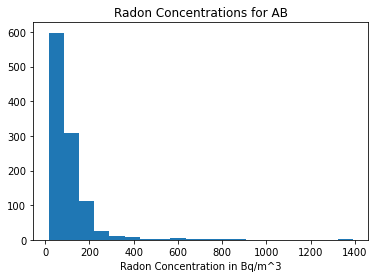

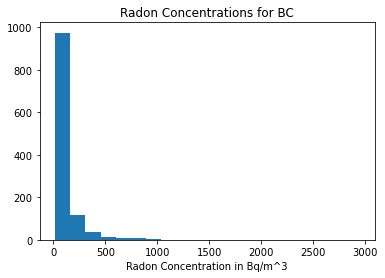

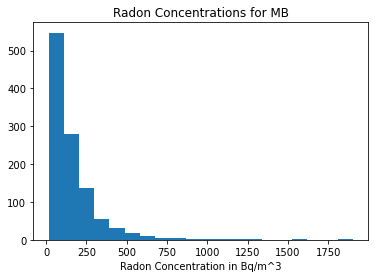

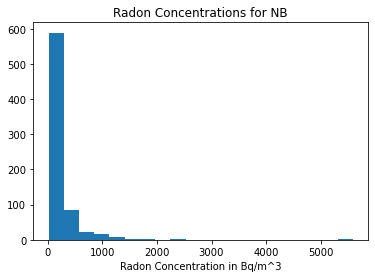

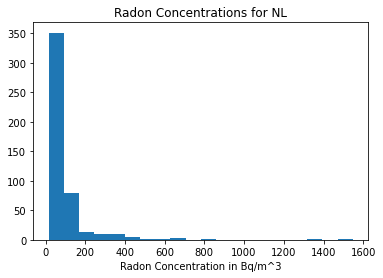

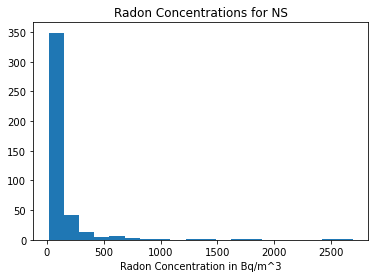

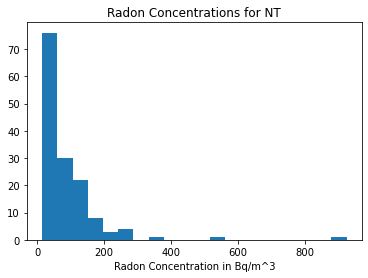

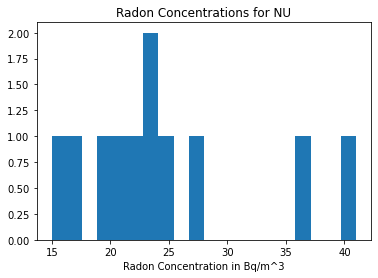

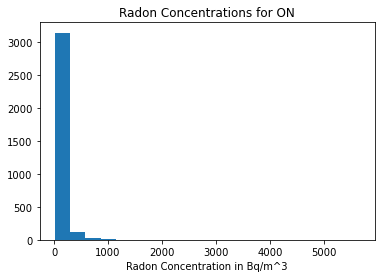

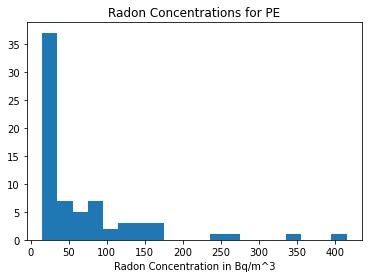

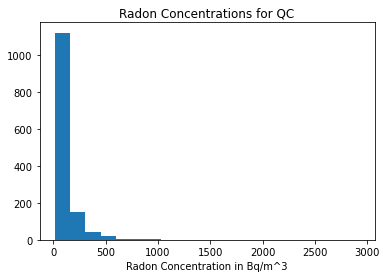

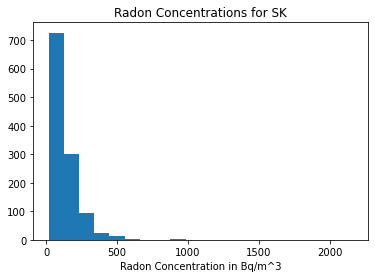

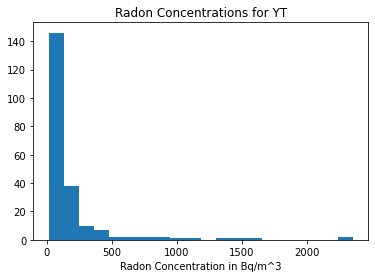

In [50]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

for P in dfsbyPT.groups.keys():
    fig, ax = plt.subplots()
    ax.set_title('Radon Concentrations for '+P)
    ax.set_xlabel('Radon Concentration in Bq/m^3')
    ax.hist(dfsbyPT.get_group(P)['AverageRadonConcentrationInBqPerM3'],20)

[Text(0, 0, 'AB'),
 Text(0, 0, 'BC'),
 Text(0, 0, 'MB'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'NL'),
 Text(0, 0, 'NS'),
 Text(0, 0, 'NT'),
 Text(0, 0, 'NU'),
 Text(0, 0, 'ON'),
 Text(0, 0, 'PE'),
 Text(0, 0, 'QC'),
 Text(0, 0, 'SK'),
 Text(0, 0, 'YT')]

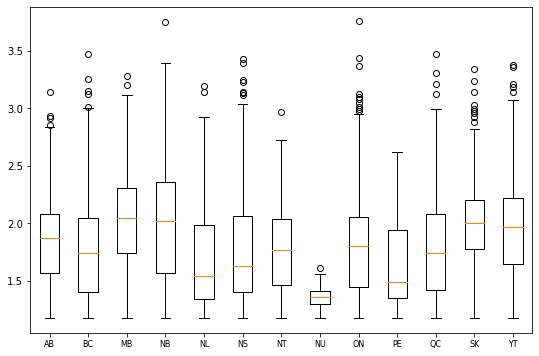

In [70]:
data_to_plot = []

for P in dfsbyPT.groups.keys():
    temp = np.log10(dfsbyPT.get_group(P)['AverageRadonConcentrationInBqPerM3'])
    data_to_plot.append(temp)

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
ax.set_xticklabels( dfsbyPT.groups.keys(), fontsize = 8)
#plt.xticks(np.arange(1,14), dfsbyPT.groups.keys())

In [58]:
dfsbyPT.get_group("AB")['AverageRadonConcentrationInBqPerM3']

10377     30
10378    286
10379    106
10380    115
10381     40
        ... 
11504    105
11505    148
11506    164
11507    174
11508     25
Name: AverageRadonConcentrationInBqPerM3, Length: 1077, dtype: int64